Temp (C)              float64
Dew Point Temp (C)    float64
Rel Hum (%)             int64
Wind Spd (km/h)         int64
Visibility (km)       float64
Stn Press (kPa)       float64
Weather                object
dtype: object


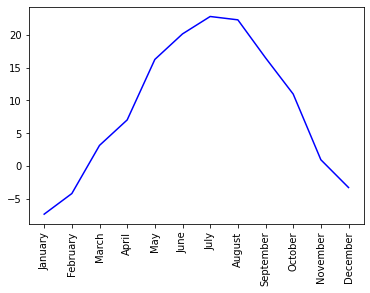

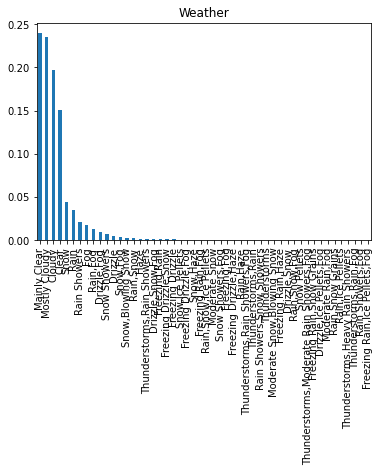

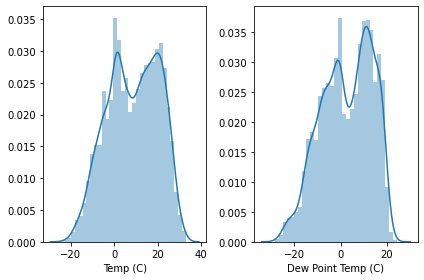

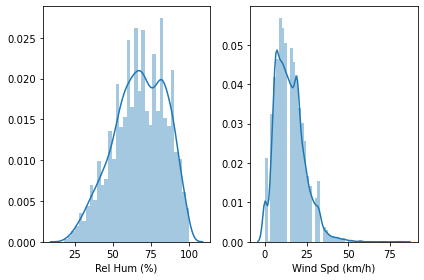

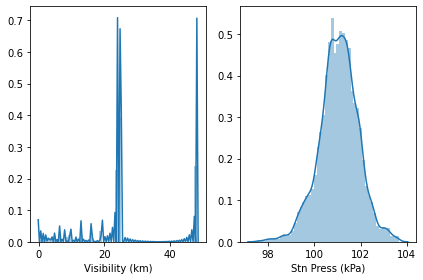

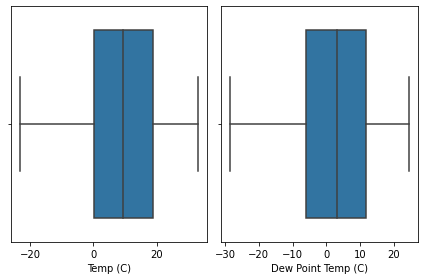

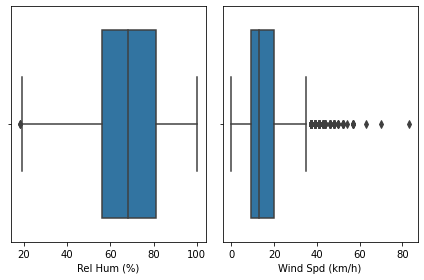

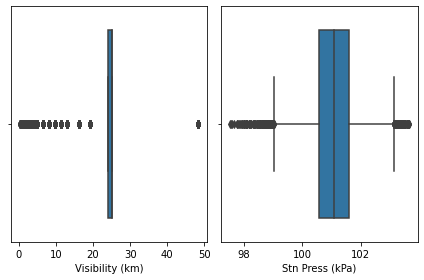

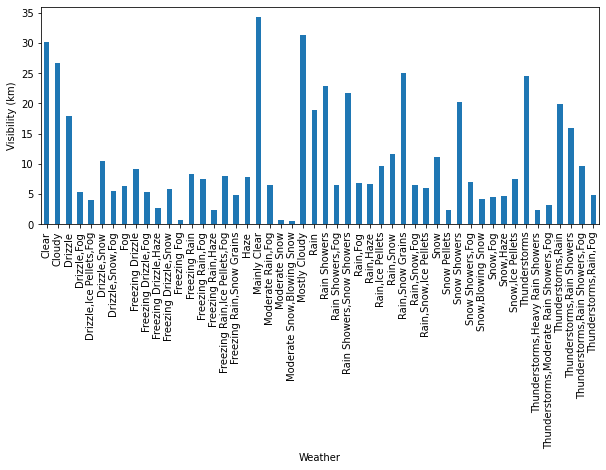

In [1]:
# Import the required Libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Generate a line chart that visualizes the readings in the months

def line_chart(df,period,col):
    """ A line chart that visualizes the readings in the months
    
    This function accepts the dataframe df ,period(day/month/year) and col(feature), which plots the aggregated value of the feature based on the periods. Ensure the period labels are properly named.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    period - Period of time over which you want to aggregate the data
    col - Feature of the dataframe
    
    """
    plt.plot(period, col, color='blue')
    plt.xticks(rotation=90)
    plt.show()







# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(df):
    """ Univariate analysis of categorical columns
    
    This function accepts the dataframe df which analyzes all the variable in the data and performs the univariate analysis using bar plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i + 1:        
            plt.subplot(121)
            df[categorical_columns[i]].value_counts(normalize = True).plot(kind = 'bar')
            plt.title(categorical_columns[i])
            plt.subplot(122)     
            df[categorical_columns[i+1]].value_counts(normalize = True).plot(kind = 'bar')
            plt.title(categorical_columns[i + 1])
            plt.tight_layout()
            plt.show()

        else:
            df[categorical_columns[i]].value_counts(normalize=True).plot(kind = 'bar')
            plt.title(categorical_columns[i])
            plt.show()




# Function to plot continous plots
def plot_cont(df,plt_typ):
    """ Univariate analysis of Numerical columns
    
    This function accepts the dataframe df, plt_type(boxplot/distplot) which analyzes all the variable in the data and performs the univariate analysis using boxplot or distplot plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    plt_type - type of plot through which you want to visualize the data
    
    """
    numerical_values = df.select_dtypes(include=['number']).columns.tolist()
    
    df = df[numerical_values]
    
    for i in range(0, len(numerical_values), 2):
        if len(numerical_values) > i + 1:
            plt.subplot(121)
            
            if plt_typ == "boxplot": 
                sns.boxplot(df[numerical_values[i]])
                plt.subplot(122)            
                sns.boxplot(df[numerical_values[i + 1]])
            elif plt_typ == "distplot":
                sns.distplot(df[numerical_values[i]])
                plt.subplot(122)            
                sns.distplot(df[numerical_values[i + 1]])  
            else:
                print("Pass either distplot/boxplot")
                
        plt.tight_layout()
        plt.show()    




# Function to plot grouped values based on the feature
def group_values(df,col1,agg1,col2):
    """ Agrregate values by grouping
    
    This function accepts a dataframe, 2 column(feature) and aggregated function(agg1) which groupby the dataframe based on the column and plots the bar plot.
   
    Keyword arguments:
    df - Pandas dataframe which has the data.
    col1 - Feature of the dataframe on which values will be aggregated.
    agg1 - Dictionary of aggregate functions with feature as the key and func as the value
    col2 - Feature of the dataframe to be plot against grouped data.
    
    Returns:
    grouping - Dataframe with all columns on which it is grouped on.
    """
    grouping = df.groupby(col1).agg(np.mean)
    plt.figure(figsize = (10, 4))
    plt.ylabel(col2)
    grouping[col2].plot(kind = "bar")
    plt.show()
    




# Read the Data and pass the parameter as parse_dates=True, index_col='Date/Time'
weather_df = pd.read_csv('weather_data.csv', parse_dates=True, index_col='Date/Time')
print(weather_df.dtypes)

# Lets try to generate a line chart that visualizes the temperature readings in the months.
# Call the function line_chart() with the appropriate parameters.
monthly = weather_df.groupby(weather_df.index.month).mean()
calendar_months = calendar.month_name[1:]

line_chart(monthly, calendar_months, monthly['Temp (C)'])


# Now let's perform the univariate analysis of categorical features.
# Call the "function plot_categorical_columns()" with appropriate parameters.
plot_categorical_columns(weather_df)

# Let's plot the Univariate analysis of Numerical columns.
# Call the function "plot_cont()" with the appropriate parameters to plot distplot
plot_cont(weather_df, 'distplot')


# Call the function "plot_cont()" with the appropriate parameters to plot boxplot
plot_cont(weather_df, 'boxplot')


# Groupby the data by Weather and plot the graph of the mean visibility during different weathers. Call the function group_values to plot the graph.
# Feel free to try on diffrent features and aggregated functions like max, min.
group_values(weather_df, 'Weather', 'mean', 'Visibility (km)')


